# E-news Express

## Background: 
An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.
Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

## Objective:
Statistical analysis of business data from E-news Express a/b Testing project. We will explore the dataset and extract insights from the data to help E-News Express aquire more subscribers. 

Through the means of statistical analysis, we will aim to answer the following questions:
1.	Explore the dataset and extract insights using Exploratory Data Analysis.
2.	Do the users spend more time on the new landing page than the old landing page?
3.	Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4.	Does the converted status depend on the preferred language? 
5.	Is the mean time spent on the new page same for the different language users?

**We will consider a significance level of 0.05 for all tests.**


### Data Dictionary:
1.	user_id - This represents the user ID of the person visiting the website.
2.	group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3.	landing_page - This represents whether the landing page is new or old.
4.	time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5.	converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6.	language_preferred - This represents the language chosen by the user to view the landing page.


### Import the required libraries

In [73]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Data Processing and Exploration

#### Load the Dataset

In [74]:
#Load the a/b Test data into a dataframe
enews = pd.read_csv('..data/enews_abtest.csv')

In [75]:
#View the first few rows of the data
enews.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [76]:
#Check the data-type and shape from the below summary
enews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [77]:
#Check all the values group column has 
#Also confirm if data reflects the given condition of old and new landing page given to control and treatment group respectively
enews['group'].groupby(enews['landing_page']).value_counts()

landing_page  group    
new           treatment    50
old           control      50
Name: group, dtype: int64

In [78]:
# Count the number of unique  user_id
enews['user_id'].nunique()

100

###### Observations
* There are 100 records in total with no missing values
* There are 5 categorical variables (user_id,group,landing_page,converted,language_preferred)
* time_spent_on_the_page is the only numerical column with continous data we can use for analysis
* Categorical variables group and landing_page are interchangable 
* Do not have the same user more than once in the dataset

#### Let's check the count of each unique category in rest of the categorical variables.

In [79]:
#Check all converted values and their counts
enews['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [80]:
#Check all language_preferred values and their counts
enews['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

In [81]:
#Drop the user_id column as we do not need it for our statistical analysis
enews_df = enews.drop(columns=['user_id'],axis = 1)

In [82]:
# Check the new dataframe
enews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   group                   100 non-null    object 
 1   landing_page            100 non-null    object 
 2   time_spent_on_the_page  100 non-null    float64
 3   converted               100 non-null    object 
 4   language_preferred      100 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


#### Summary statistic and Data processing

In [83]:
# Let's get statistical summary for the original sample
enews_df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [84]:
#Create separate dataframes for the controled and treatment groups for ease of analysis
control_df = enews_df[enews_df['group'] == 'control'].copy()
treatment_df = enews_df[enews_df['group'] == 'treatment'].copy()

In [85]:
#Let's look at the summary statistics for the control group
control_df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,50.0,4.5324,2.581975,0.19,2.72,4.38,6.4425,10.3


In [86]:
#Let's look at the summary statistics for the treatment group
treatment_df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,50.0,6.2232,1.817031,1.65,5.175,6.105,7.16,10.71


## 1. Exploratory Data Analysis

#### Let's explore distribution of Time Spent on page using visualization

In [87]:
#Create function to generate both boxplot and histogram for univariate analysis
def univariate_distribution(data,columnname,xaxis,kde=False,hue=None,element=None):
    #Set plot settings
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=(7,6),)  
    # Creating Boxplot
    sns.boxplot(data=data, x=columnname, ax=ax_box2, showmeans=True, color='hotpink')  
    # Creating histplot
    sns.histplot(data=data, x=columnname, kde=kde,hue=hue,element=element, ax=ax_hist2,color='Indigo') 
    # Show mean and median in histogram
    ax_hist2.axvline(data[columnname].mean(), color="green", linestyle="--")     
    ax_hist2.axvline(data[columnname].median(), color="red", linestyle="-")
    #Axis lables
    plt.xlabel(xaxis)   # label the x-axis
    plt.ylabel('Frequency')   # label the y-axis

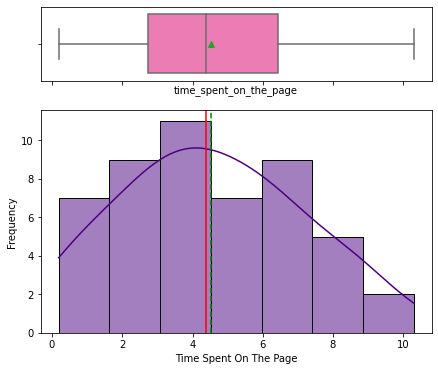

In [88]:
#Plot the time spent distribution for the control groups
univariate_distribution(control_df,'time_spent_on_the_page','Time Spent On The Page',kde=True,element='bars')

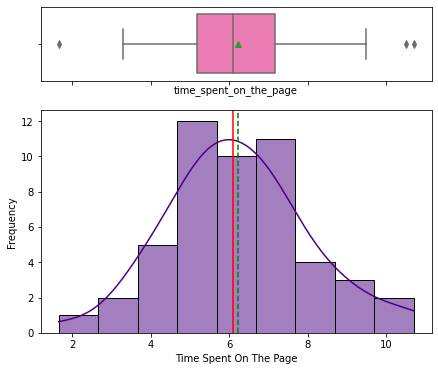

In [89]:
#Plot the time spent distribution for the treatment groups
univariate_distribution(treatment_df,'time_spent_on_the_page','Time Spent On The Page',kde=True,element='bars')

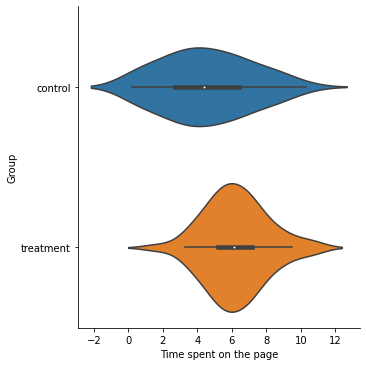

In [90]:
# Compare the time spent distribution for both groups
sns.catplot(x='time_spent_on_the_page',y = 'group', kind='violin',data=enews_df);
plt.xlabel('Time spent on the page');   # label the x-axis
plt.ylabel('Group');   # label the y-axis


#### Observations
* Time spent has a normal distribution for both the treatment and the control group
* While the control group doesn't have any outliers, treatment group does have some outliers
* Data is not skewed for either groups
* Mean and medians are very close for both groups
* Mean time spent on the new page is slightly higher than the mean time spent on the old page

#### Let's explore relationship between multiple variables using visualization

###### Conversion rate and group

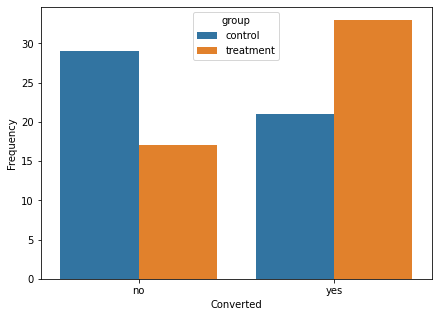

In [91]:
# Let's compare the conversion status count for both treatment and control groups
plt.figure(figsize=(7,5))
sns.countplot(x="converted",hue='group', data=enews_df)
plt.ylabel('Frequency')
plt.xlabel('Converted')
plt.show()

#### Observations
* Number of conversion is higher for the treatment group
* So there seems to be a corelation between conversion and group

##### Conversion rate and time spent

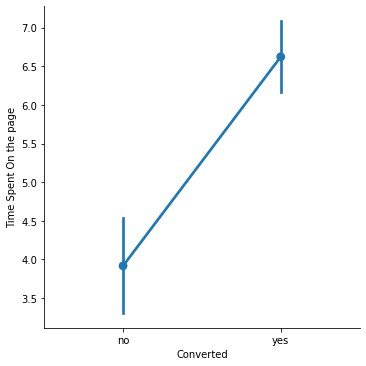

In [103]:
# Time spent on the page for each group by conversion status
sns.catplot(x="converted",y="time_spent_on_the_page", data=enews_df, kind="point")
plt.ylabel('Time Spent On the page')
plt.xlabel('Converted')
plt.show()

#### Observations
* From the plot we see that people who converted spent more time on the page

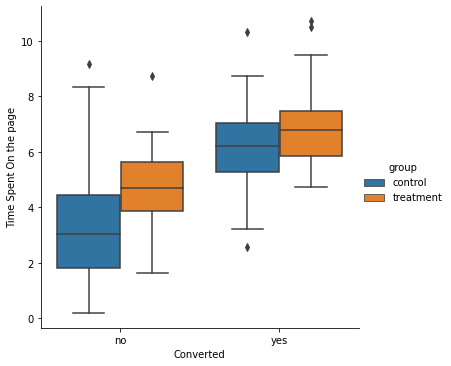

In [102]:
# Now let's compare the relationship between convert status and time spent on the page for both groups
sns.catplot(x='converted', y='time_spent_on_the_page', kind='box',hue='group', data=enews_df)
plt.ylabel('Time Spent On the page')
plt.xlabel('Converted')
plt.show()

#### Observations
* People who converted spent significantly more time on the page for both control and treatment groups
* The time spent on the page improved for both people who converted and did not convert in treatment group

##### Conversion rate and preffered language

In [104]:
#Create a table with counts for each conversion status by group and language preference
conversion_count = enews_df[['language_preferred','converted','group']].value_counts()
language_group_conversion = conversion_count.reset_index().rename(columns={0: 'conversion_count'})

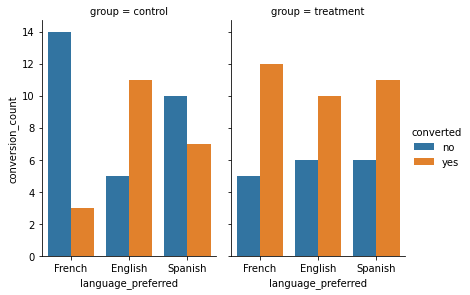

In [105]:
# Generate a plot to compare the conversion count for each language preference by group
sns.catplot(x="language_preferred", y="conversion_count",
                hue="converted", col="group",
                data=language_group_conversion, kind="bar",
                height=4, aspect=.7);

##### Observation 
* Conversion rate is higher in the treatment group than the control group
* Conversion count improves the most in the treatment group for French langue audience 
* English language audience conversion is affected the least by the new page

##### Language and Total time spent

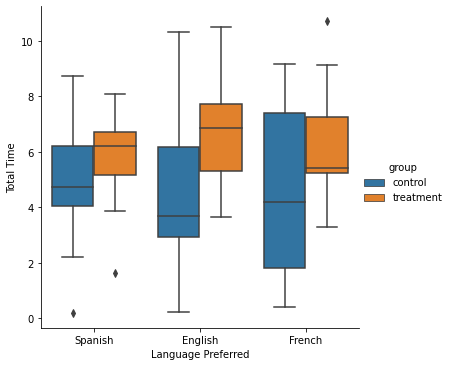

In [106]:
# Time spent on the page for each group by language preference
sns.catplot(x='language_preferred', y='time_spent_on_the_page', kind='box',hue='group', data=enews_df)
plt.ylabel('Total Time')
plt.xlabel('Language Preferred')
plt.show()

##### Observation 
* There seems to be some correlation between the time spent on the page and preferred language 
* Base on the sample, the mean time spent on the page improves for treatment group for all three language audience
* The mean time spent on the page improves the most in treatment group for English language audience
* Time spent on the page improves least for French audience which has a left skewed distribution

### From our above analysis, we see possible corelation between time spent on the page, group, conversion and preferred language in the provided sample data. We would like to do further statistical analysis to confirm our hypothesis.

## 2. Do the users spend more time on the new landing page than the old landing page?

From our above exploration of data and the summary statistics for both the old and new sites, we noticed there is difference in the mean time spent on the page between the two groups. 

Let's plot the time spent distribution for both the new landing page and the old landing page so that we can get an understanding of the sample distribution as well as compare the mean time spent for both pages.

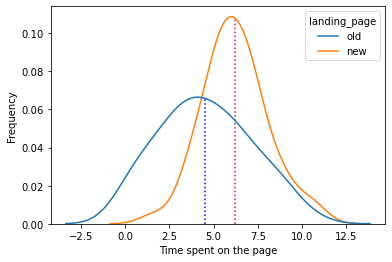

In [107]:
# Compare the time spent distribution for both groups
#Draw kde plot for both control and treatment groups
ax = sns.kdeplot(data=enews_df, x="time_spent_on_the_page", hue="landing_page")

#Draw a line for the mean time spent on the old landing page
mean_old = control_df.mean()
kdeline1 = ax.lines[1]
xs1 = kdeline1.get_xdata()
ys1 = kdeline1.get_ydata()
height1 = np.interp(mean_old, xs1, ys1)
ax.vlines(mean_old, 0, height1, color='blue', ls=':')

#Draw a line for the mean time spent on the new landing page
mean_new = treatment_df.mean()
kdeline2 = ax.lines[0]
xs2 = kdeline2.get_xdata()
ys2 = kdeline2.get_ydata()
height2 = np.interp(mean_new, xs2, ys2)
ax.vlines(mean_new, 0, height2, color='crimson', ls=':')

#Set lables and show the plot
plt.xlabel('Time spent on the page');   # label the x-axis
plt.ylabel('Frequency');   # label the y-axis
plt.show()



Based on the above visual and our previous exploration of the data, we gather the following:

* Time spent on site is a continous data, measured in minutes
* Time spent on the site has normal distribution for both old landing page and new landing page
* We received random sampling from the population
* We will be comparing two sets of independent data. 50 users are selected to be in the control group receiving the old page and 50 users are selected to be in the treatment group receiving the new page

In order to confirm if there is a true difference between the mean times, we will have to perform a two sample, one tailed test.

As our samples have size greater than 30, we should be able to perform either the t-test and z-test to come to a conclusion. 

Therefore, we will be using two sample T-test to test our hypothesis. 

###### The level of significance used for this test will be .05

#### Let's write our null and alternative hypothesis
Let  $\mu_n$,$\mu_o$ be the mean time spent on the new page and mean time spent on the old page.

We will test the null hypothesis

> $H_0:\mu_n=\mu_o$

against the alternate hypothesis

> $H_a:\mu_n>\mu_o$

In [55]:
# find the sample means and sample standard deviations for the two samples
print('The mean time spent on the old page ' + str(control_df['time_spent_on_the_page'].mean()))
print('The mean time spent on the new page ' + str(treatment_df['time_spent_on_the_page'].mean()))
print('The standard deviation of time spent for old page is ' + str(round(control_df['time_spent_on_the_page'].std(), 2)))
print('The standard deviation of time spent for new page is  ' + str(round(treatment_df['time_spent_on_the_page'].std(), 2)))

The mean time spent on the old page 4.532400000000001
The mean time spent on the new page 6.2232
The standard deviation of time spent for old page is 2.58
The standard deviation of time spent for new page is  1.82


#### Let's find the p-value

In [56]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(treatment_df['time_spent_on_the_page'],control_df['time_spent_on_the_page'], equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


#### Insight
As the p-value (~0.000139) is much less than the level of significance .05, we reject the null hypothesis. Hence we have enough evidence to say that the time spent on the new page is greater than the time spent on the old page.

## 3. Is the conversion rate for the new page greater than the conversion rate for the old page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Let's generate a visual representation of these two variables for each group to get a clear picture. 

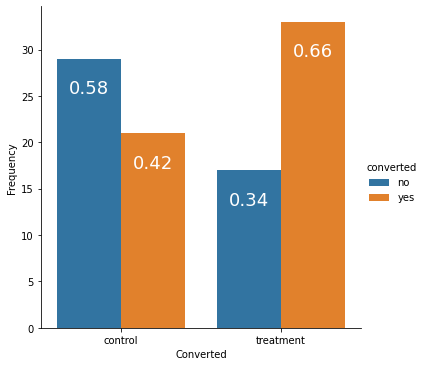

In [109]:
# Let's compare the conversion status percent for both treatment and control groups
ax = sns.catplot(x="group",hue='converted', data=enews_df,kind='count')
#Add the percent for each bar as annotation
for p in ax.ax.patches:
    ax.ax.annotate(f'\n{p.get_height()/50}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.ylabel('Frequency')
plt.xlabel('Converted')
plt.show()

From the above visual and our analysis of the data, this is what we observe:

* Percent of converted (yes) is clearly higher for the treatment group compared to the control group
* Binomially distributed population. A user is either converted or not
* Random sampling from the population
* The sample size for both samples are 50. As the sample sizes are larger than 30, we can assume the binomial distribution approaximate to normal distribution. 

We can confirm this assumption through the below calculations. We will check if np and n(1-p) are greater than or equal to 10 for both samples. Here, n and p refer to the sample size and sample proportion respectively.

In [78]:
#Let's find the proportions of users converted for both the old and new page
p_new = treatment_df[treatment_df['converted'] == 'yes']['converted'].count()/treatment_df['converted'].count()
p_old = control_df[control_df['converted'] == 'yes']['converted'].count()/control_df['converted'].count()

print('The proportion of users converted on the new site ' + str(p_new))
print('The proportion of users converted on the old site ' + str(p_old))

The proportion of users converted on the new site 0.66
The proportion of users converted on the old site 0.42


In [79]:
#Check if np and n(1-p) are greater than or equal to 10 for both samples

#Sample size is 50 for both old and new site data
n = 50 

#For new site samples, 
print('np for new site is ' + str(n*p_new) + ' which is > 10')
print('n(1-p) for new site is ' + str(n*(1-p_new)) + ' which is > 10')

#For old site samples,
print('np for old site is ' + str(n*p_old) + ' which is > 10')
print('n(1-p) old new site is ' + str(round(n*(1-p_old),2)) + ' which is > 10')


np for new site is 33.0 which is > 10
n(1-p) for new site is 17.0 which is > 10
np for old site is 21.0 which is > 10
n(1-p) old new site is 29.0 which is > 10


We can safely assume that the binomila distribution approaximates normal distribution. 

Therefore we can use Two Proportion Z-test for our analysis. 

###### The level of significance used for this test will be .05

#### Let's write the null and alternative hypothesis
Let $p_n,p_o$ be the proportions of conversion in new site and old site respectively.

We will test the following null hypothesis

>$H_0:p_n =p_o$

against the alternate hypothesis

>$H_a:p_n > p_o$

#### Let's find the p-value

From the above calculations, we see that conversion rate in new and old sites are different. We will calculate the p-value below to check if this difference is significant. 

In [80]:
# Import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# Set the counts of conversion
conversion_count_new = treatment_df[treatment_df['converted'] == 'yes']['converted'].count()
conversion_count_old = control_df[control_df['converted'] == 'yes']['converted'].count()

# Set the sample sizes
total_count_new = treatment_df['converted'].count()
total_count_old = control_df['converted'].count()

# Find the p-value
test_stat, p_value = proportions_ztest([conversion_count_new,conversion_count_old], [total_count_new,total_count_old])
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


###### Insight
As the p-value (~0.01605) is much less than the level of significance .05, we reject the null hypothesis. Hence, we have enough evidence to say that the conversion rate for the new page was greater than the conversion rate for the old page

## 4. Does the converted status depend on the preferred language?
Does the converted status depend on the preferred language? 

Let's take a look at a count plot depicting number of converted for each language preffered side by side to spot any similarities or difference between the demgraphics.


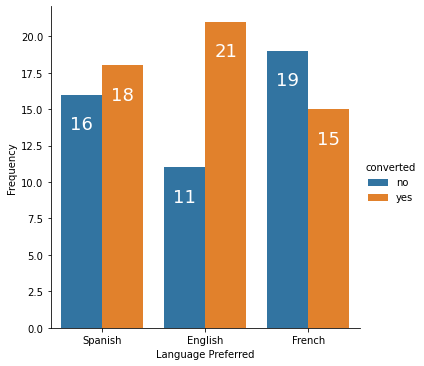

In [108]:
# Time spent on the page for each group by language preference
ax = sns.catplot(x='language_preferred', kind='count',hue='converted', data=enews_df)
for p in ax.ax.patches:
    ax.ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.ylabel('Frequency')
plt.xlabel('Language Preferred')
plt.show()

From the visualization we see:
* Both Spanish and English has a higher count for Yes than No
* However for French, we see a higher count of No than Yes

Therefore it's hard to make an assumption as to whether the language preference has any effect on conversion rate

Here we will have to depend on the Chi-Square Test for Independence to verify if the converted status is dependent on the preffered language. 

#### Let's test whether the assumptions for Chi-Square Test for Independence are satisfied or not
* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

##### The level of significance used for this test will be .05

#### Let's write the null and alternative hypothesis
We will test the below null hypothesis

>$H_0:$  Converted status is independent of the preferred language

against the alternate hypothesis

>$H_a:$  Converted status is dependent on the preferred language

In [40]:
#Create contingency table using Cross tab
crosstab_df = pd.crosstab(index=[enews_df['language_preferred']],columns=enews_df['converted'])
crosstab_df.head()

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


#### Let's find the p-value

In [15]:
# Import the required function
from scipy.stats import chi2_contingency

# Find the p-value
chi, p_value, dof, expected = chi2_contingency(crosstab_df)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


#### Insight
As the p-value 0.21 is much greater than the level of significance .05, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the conversion status is independent of the preffered language at 5% significance level.

## 5. Is the mean time spent on the new page same for the different language users?

Is the mean time spent on the new page same for the different language users?

First let's explore the differences between the mean time spent for different language users by comparing the mean time for each language demographic for the new page.

In [114]:
#Let's calculate the mean time for each language for our reference
treatment_df.groupby(['language_preferred']).mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


We can get better insight by comparing the boxplot of time spent for each language for the treatment group

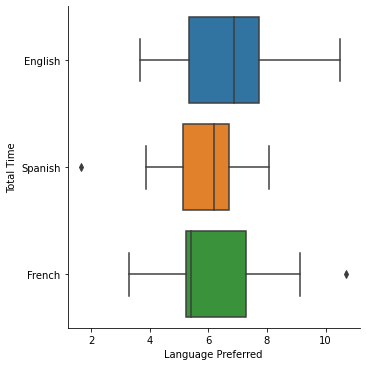

In [110]:
# Time spent on the page for each group by language preference
sns.catplot(x='time_spent_on_the_page',y='language_preferred', kind='box', data=treatment_df)
plt.ylabel('Total Time')
plt.xlabel('Language Preferred')
plt.show()

##### Observation
We observe slight differences in the mean time for each language demographics in the treatment group. However, we would need to perform further statistical analysis to prove our hypothesis. 
In this case, we will apply One-way ANOVA Test.

### Let's write the null and alternative hypothesis

Let $\mu_e, \mu_s, \mu_f$ be the mean time spent on the new page for English, Spanish and French language demographic respectively

We will test the null hypothesis

>$H_0: \mu_e = \mu_s = \mu_f$

against the alternative hypothesis

>$H_a: $ At least one mean time spent is different from the rest.


Now, the normality and equality of variance assumptions need to be checked. 

For testing of normality, Shapiro-Wilk’s test will be applied to the mean time spent.

For equality of variance, Levene test will be applied to the mean time spent.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Mean time spent follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Mean time spent does not follow a normal distribution

In [120]:
# Test Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(treatment_df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test 0.8040 is very large, we fail to reject the null hypothesis that the time spent follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [121]:
#Test Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( treatment_df['time_spent_on_the_page'][treatment_df['language_preferred']=='English'], 
                                   treatment_df['time_spent_on_the_page'][treatment_df['language_preferred']=='Spanish'], 
                                   treatment_df['time_spent_on_the_page'][treatment_df['language_preferred']=='French'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since p-value of the test 0.4671 is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.


### Let's find the p-value

In [22]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway( treatment_df['time_spent_on_the_page'][treatment_df['language_preferred']=='English'], 
                                   treatment_df['time_spent_on_the_page'][treatment_df['language_preferred']=='Spanish'], 
                                   treatment_df['time_spent_on_the_page'][treatment_df['language_preferred']=='French'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Insight
As the p-value is much greater than the significance level .05, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that for the treatment group, at least one mean time spent is different from the rest at 5% significance level.
